In [64]:
#Inspiration:
#stationary or nonstationary: https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/
#kaggle comprehensive guide: https://www.kaggle.com/code/ankumagawa/time-series-forecast-a-comprehensive-guide
#kaggle: https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda
# Arima Sarima: https://www.kaggle.com/code/sadeght/arima-sarima-simple-clear-analysis
#Sarima: https://www.kaggle.com/code/mechatronixs/time-series-forecasting-arima

'''
You have at your disposal a dataset of anonymized records of patient arrivals at the emergency room
hospital admission. The client is a hospital that would like to put it in the hands of the superiors
nurses support tool for planning shifts for the next day. The hospital itself may not even know
what else could be interesting from the data, it is not necessary to focus only on senior nurses.
Tasks:
Perform initial data set analysis (EDA) and document your findings.
'''

'\nYou have at your disposal a dataset of anonymized records of patient arrivals at the emergency room\nhospital admission. The client is a hospital that would like to put it in the hands of the superiors\nnurses support tool for planning shifts for the next day. The hospital itself may not even know\nwhat else could be interesting from the data, it is not necessary to focus only on senior nurses.\nTasks:\nPerform initial data set analysis (EDA) and document your findings.\n'

In [65]:
#GOAL: Predict number of admissions based on the date!!!

In [66]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import datetime
from datetime import time


import math
from sklearn.metrics import mean_squared_error

In [67]:
#enable to see all columns in a notebook
pd.set_option('display.max_columns', None)

#enable to see all rows in a notebook
pd.set_option('display.max_rows', None)

In [68]:
###############################
#PART I - UNDERSTAND THE DATA
###############################

In [69]:
#read data into dataframe
df = pd.read_excel('data.xlsx')

In [70]:
df.head(10)

,číslo,ročník,datum a čas,příjat,důvod,odeslán,lékař
0,20200001,46,2020-01-01 04:18:00,přes RZP/LSPP,bolest na hrudi,na oddělení KK,MUDr. Jan První
1,20200002,83,2020-01-01 09:09:00,z ambulance KK IKEM,jiný,domácí ošetření,MUDr. Pavel Druhý
2,20200003,72,2020-01-01 11:35:00,bez doporučení,palpitace,domácí ošetření,MUDr. Pavel Druhý
3,20200004,99,2020-01-01 14:23:00,bez doporučení,bolest na hrudi,na oddělení KK,MUDr. Pavel Druhý
4,20200005,28,2020-01-01 15:06:00,přes RZP/LSPP,jiný,na oddělení KK,MUDr. Pavel Druhý
5,20200006,53,2020-01-01 16:59:00,bez doporučení,palpitace,domácí ošetření,MUDr. Pavel Druhý
6,20200007,64,2020-01-01 17:21:00,přes RZP/LSPP,bolest na hrudi,na oddělení KK,MUDr. Pavel Druhý
7,20200008,76,2020-01-02 01:24:00,bez doporučení,palpitace,na oddělení KK,MUDr. Pavel Druhý
8,20200009,87,2020-01-02 07:25:00,bez doporučení,jiný,domácí ošetření,MUDr. Jitka Třetí
9,20200010,58,2020-01-02 07:55:00,od ambulantního lékaře,kardioverze,domácí ošetření,MUDr. Jitka Třetí


In [71]:
df.tail(10)

,číslo,ročník,datum a čas,příjat,důvod,odeslán,lékař
5041,20205070,86,2020-12-30 16:11:00,bez doporučení,jiný,domácí ošetření,MUDr. Kateřina Čtyřicátá
5042,20205071,45,2020-12-30 18:44:00,bez doporučení,palpitace,domácí ošetření,MUDr. Kateřina Čtyřicátá
5043,20205072,53,2020-12-31 07:50:00,od ambulantního lékaře,kardioverze,domácí ošetření,MUDr. Pavel Druhý
5044,20205073,55,2020-12-31 07:51:00,od ambulantního lékaře,kardioverze,domácí ošetření,MUDr. Pavel Druhý
5045,20205074,45,2020-12-31 08:11:00,bez doporučení,palpitace,domácí ošetření,MUDr. Pavel Druhý
5046,20205075,44,2020-12-31 11:56:00,přes RZP/LSPP,palpitace,na oddělení KK,MUDr. Pavel Druhý
5047,20205076,48,2020-12-31 12:17:00,bez doporučení,jiný,domácí ošetření,MUDr. Pavel Druhý
5048,20205077,41,2020-12-31 12:54:00,přes RZP/LSPP,bolest na hrudi,na oddělení KK,MUDr. Pavel Druhý
5049,20205078,40,2020-12-31 14:41:00,bez doporučení,bolest na hrudi,domácí ošetření,MUDr. Pavel Druhý
5050,20205079,59,2020-12-31 19:35:00,z jiné nemocnice,jiný,na oddělení KK,MUDr. Pavel Druhý


In [72]:
df.shape

(5051, 7)

In [73]:

# #Pandas profiling
# profile = ProfileReport(df, tsmode=True, sortby="datum a čas")
# profile.to_file('profile_report.html')


In [74]:
###############################
#PART II - CLEAN THE DATA
###############################

In [75]:
#Rename the columns from Czech into English 
#reason: not to keep switching keyboard language all the time = nuisance :-), for the nurse's purposes we would switch back to Czech

list_org=['číslo','ročník','datum a čas','příjat','důvod','odeslán','lékař']
list_new=['id_number','birth_year','date_time','admission_type','reason','sent_to','doctor']

for i in range(len(list_org)):
    df = df.rename(columns = {list_org[i]: list_new[i]}, inplace = False)

#check the changes
df.columns

Index(['id_number', 'birth_year', 'date_time', 'admission_type', 'reason',
       'sent_to', 'doctor'],
      dtype='object')

In [76]:
#categorical values
categ_columns = df.select_dtypes(exclude=[np.number])
categ_columns.describe()

C:\Users\macab\AppData\Local\Temp\ipykernel_14464\2641953438.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categ_columns.describe()


,date_time,admission_type,reason,sent_to,doctor
count,5051,5051,5051,5051,4967
unique,4972,7,6,162,51
top,2020-10-14 07:56:00,bez doporučení,bolest na hrudi,domácí ošetření,MUDr. Kamila Devátá
freq,3,1780,1221,3357,608
first,2020-01-01 04:18:00,NaN,NaN,NaN,NaN
last,2020-12-31 19:35:00,NaN,NaN,NaN,NaN


In [77]:
#get a closer look at categorical with high cardinality
df['sent_to'].value_counts()

domácí ošetření                                               3357
na oddělení KK                                                1289
na jinou kliniku IKEM                                           95
TN                                                              28
Interna TN                                                      27
interna TN                                                      24
FTN                                                             20
Neurologie TN                                                    8
Interní klinika TN                                               5
Interna FTN                                                      5
FN Motol                                                         4
Interna Říčany                                                   4
Thomayerova nemocnice                                            4
interna FTN                                                      3
Nemocnice pod Petřínem                                        

In [78]:
#fix column with high cardinality
df["sent_to"] = df["sent_to"].apply(lambda x: x if x=='domácí ošetření' or x=='na oddělení KK' else 'Other')
                                               

In [79]:
#get rid of little fractions  in admission type
df["admission_type"] = df["admission_type"].apply(lambda x: 
                                            'other' if x=='z oddělení KK IKEM' or x=='z jiné kliniky IKEM' else x)

In [80]:
#check the changes
df['admission_type'].value_counts()

bez doporučení            1780
přes RZP/LSPP             1279
od ambulantního lékaře    1081
z jiné nemocnice           403
z ambulance KK IKEM        367
other                      141
Name: admission_type, dtype: int64

In [81]:
#rename categorical values in a column
df['sent_to'] = df['sent_to'].map({'domácí ošetření': 'Home Treatment', 
                                    'na oddělení KK': 'Cardio Clinic Department',
                                    'Other': 'Other',
                                    })

In [82]:
#rename categorical values in a column
df['admission_type'] = df['admission_type'].map({'bez doporučení': 'without recommendation', 
                                    'přes RZP/LSPP': 'by ambulance', 
                                    'od ambulantního lékaře': 'from ambulant doctor', 
                                    'z jiné nemocnice': 'from other hospital', 
                                    'z ambulance KK IKEM': 'from A&E Cardio Clinic IKEM',
                                    'other':'other'
                                    })

In [83]:
#rename categorical values in a column
df['reason'] = df['reason'].map({'bolest na hrudi': 'chestpain', 
                                    'palpitace': 'palpitation', 
                                    'kardioverze': 'cardioversion', 
                                    'jiný': 'other', 
                                    'dušnost': 'breathlessness',
                                    'bezvědomí': 'unconsciousness'
                                    })

In [84]:
#check the changes
df['sent_to'].value_counts()

Home Treatment              3357
Cardio Clinic Department    1289
Other                        405
Name: sent_to, dtype: int64

In [85]:
#check for NaN
df_nan=df.isnull().sum().sort_values(ascending = False)[0:10]
df_nan

doctor            84
id_number          0
birth_year         0
date_time          0
admission_type     0
reason             0
sent_to            0
dtype: int64

In [86]:
#drop useless columns
df=df.drop(['id_number', 'doctor'], axis=1)

In [87]:
#check for duplicates
rows_duplicate=df.duplicated(keep=False).sum()
rows_before=df.shape[0]

print(rows_duplicate)
print(rows_before)

8
5051


In [88]:
#remove duplicates
df=df.drop_duplicates(keep='last') #keeps the last duplicate

In [89]:
#check how many rows were deleted
rows_after=df.shape[0]
deleteted_rows=rows_before-rows_after

print(deleteted_rows)

4


In [90]:
#add column 'age'
df["age"] = df["birth_year"].apply(lambda x:    2020-(x+1900) if x>=10 else
                                                2020-(x+2000))
df.head(5)


,birth_year,date_time,admission_type,reason,sent_to,age
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92


In [91]:
#create bins for 'age' column
df['age_group'] = pd.cut(df['age'], bins=[10,20,30,40,50,60,70,80,90,150], labels=['11÷20','21÷30','31÷40','41÷50','51÷60','61÷70', '71÷80','81÷90','91+'])
df.head(5)

,birth_year,date_time,admission_type,reason,sent_to,age,age_group
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74,71÷80
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37,31÷40
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48,41÷50
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21,21÷30
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92,91+


In [92]:
#check min and max values for 'age'
print(df['age'].max())
print(df['age'].min())

100
17


In [93]:
#show specific rows 
df.loc[1000:5000:500] #start:stop:step

,birth_year,date_time,admission_type,reason,sent_to,age,age_group
1000,37,2020-02-26 13:24:00,from ambulant doctor,other,Home Treatment,83,81÷90
1500,46,2020-04-14 07:53:00,without recommendation,palpitation,Home Treatment,74,71÷80
2000,53,2020-05-22 11:21:00,other,other,Cardio Clinic Department,67,61÷70
2500,52,2020-06-26 09:25:00,other,other,Cardio Clinic Department,68,61÷70
3002,47,2020-08-05 09:19:00,from ambulant doctor,cardioversion,Home Treatment,73,71÷80
3503,46,2020-09-10 07:47:00,without recommendation,palpitation,Home Treatment,74,71÷80
4003,47,2020-10-15 10:43:00,without recommendation,breathlessness,Other,73,71÷80
4503,48,2020-11-24 09:48:00,from A&E Cardio Clinic IKEM,cardioversion,Home Treatment,72,71÷80


In [94]:
#create 'time', 'day', 'week', 'month' column

#date without time
df['date'] = df['date_time'].dt.date
#time
df['time'] = df['date_time'].dt.time
#day of week
df['day_of_week']=df['date_time'].dt.dayofweek
#day
df['day']=df['date_time'].dt.day
#week
df['week'] = df['date_time'].dt.isocalendar().week
#month
df['month'] = df['date_time'].dt.month
#year
df['year'] = df['date_time'].dt.year



df.loc[100:1000:100]

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year
100,55,2020-01-07 08:02:00,from ambulant doctor,cardioversion,Home Treatment,65,61÷70,2020-01-07,08:02:00,1,7,2,1,2020
200,53,2020-01-13 10:53:00,from ambulant doctor,cardioversion,Home Treatment,67,61÷70,2020-01-13,10:53:00,0,13,3,1,2020
300,54,2020-01-19 15:33:00,from other hospital,chestpain,Cardio Clinic Department,66,61÷70,2020-01-19,15:33:00,6,19,3,1,2020
400,46,2020-01-24 10:37:00,without recommendation,other,Home Treatment,74,71÷80,2020-01-24,10:37:00,4,24,4,1,2020
500,82,2020-01-29 16:30:00,by ambulance,palpitation,Home Treatment,38,31÷40,2020-01-29,16:30:00,2,29,5,1,2020
600,41,2020-02-04 12:44:00,by ambulance,breathlessness,Home Treatment,79,71÷80,2020-02-04,12:44:00,1,4,6,2,2020
701,55,2020-02-10 19:36:00,by ambulance,chestpain,Cardio Clinic Department,65,61÷70,2020-02-10,19:36:00,0,10,7,2,2020
801,34,2020-02-15 08:01:00,from ambulant doctor,cardioversion,Home Treatment,86,81÷90,2020-02-15,08:01:00,5,15,7,2,2020
901,76,2020-02-20 21:15:00,without recommendation,breathlessness,Other,44,41÷50,2020-02-20,21:15:00,3,20,8,2,2020


In [95]:
#rename days
list=['1-Mo','2-Tu','3-We','4-Th','5-Fr','6-Sa','7-Su']

df['day_of_week']=df['day_of_week'].replace(np.linspace(0,6,7), list)
df.head(5)

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74,71÷80,2020-01-01,04:18:00,3-We,1,1,1,2020
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37,31÷40,2020-01-01,09:09:00,3-We,1,1,1,2020
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48,41÷50,2020-01-01,11:35:00,3-We,1,1,1,2020
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21,21÷30,2020-01-01,14:23:00,3-We,1,1,1,2020
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92,91+,2020-01-01,15:06:00,3-We,1,1,1,2020


In [96]:
#create 'season' column
df["season"] = df["month"].apply(lambda x: 
                                            '1-winter' if x==12 or x==1 or x==2 else 
                                            ('2-spring' if x==3 or x==4 or x==5 else
                                            ('3-summer' if x==6 or x==7 or x==8 else
                                            '4-autumn')))
df.head(5)

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year,season
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74,71÷80,2020-01-01,04:18:00,3-We,1,1,1,2020,1-winter
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37,31÷40,2020-01-01,09:09:00,3-We,1,1,1,2020,1-winter
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48,41÷50,2020-01-01,11:35:00,3-We,1,1,1,2020,1-winter
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21,21÷30,2020-01-01,14:23:00,3-We,1,1,1,2020,1-winter
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92,91+,2020-01-01,15:06:00,3-We,1,1,1,2020,1-winter


In [97]:
#show specific rows 
df.loc[1000:5000:1000] #start:stop:step

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year,season
1000,37,2020-02-26 13:24:00,from ambulant doctor,other,Home Treatment,83,81÷90,2020-02-26,13:24:00,3-We,26,9,2,2020,1-winter
2000,53,2020-05-22 11:21:00,other,other,Cardio Clinic Department,67,61÷70,2020-05-22,11:21:00,5-Fr,22,21,5,2020,2-spring
3002,47,2020-08-05 09:19:00,from ambulant doctor,cardioversion,Home Treatment,73,71÷80,2020-08-05,09:19:00,3-We,5,32,8,2020,3-summer
4003,47,2020-10-15 10:43:00,without recommendation,breathlessness,Other,73,71÷80,2020-10-15,10:43:00,4-Th,15,42,10,2020,4-autumn


In [98]:
#create 'shift' column
df['shift'] = df['time'].apply(lambda x: 'morning' if x > time(6, 0, 0) and x < time(18, 0, 0) else 'night')
df.head(5)

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year,season,shift
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74,71÷80,2020-01-01,04:18:00,3-We,1,1,1,2020,1-winter,night
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37,31÷40,2020-01-01,09:09:00,3-We,1,1,1,2020,1-winter,morning
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48,41÷50,2020-01-01,11:35:00,3-We,1,1,1,2020,1-winter,morning
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21,21÷30,2020-01-01,14:23:00,3-We,1,1,1,2020,1-winter,morning
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92,91+,2020-01-01,15:06:00,3-We,1,1,1,2020,1-winter,morning


In [99]:
#encode 'shift' column
df = pd.get_dummies(df, columns = ["shift"], prefix=["shift"])

In [100]:
#add column with admissions (helps to calculate sum of shifts)
df['total_admissions'] = 1
df.head(5)

,birth_year,date_time,admission_type,reason,sent_to,age,age_group,date,time,day_of_week,day,week,month,year,season,shift_morning,shift_night,total_admissions
0,46,2020-01-01 04:18:00,by ambulance,chestpain,Cardio Clinic Department,74,71÷80,2020-01-01,04:18:00,3-We,1,1,1,2020,1-winter,0,1,1
1,83,2020-01-01 09:09:00,from A&E Cardio Clinic IKEM,other,Home Treatment,37,31÷40,2020-01-01,09:09:00,3-We,1,1,1,2020,1-winter,1,0,1
2,72,2020-01-01 11:35:00,without recommendation,palpitation,Home Treatment,48,41÷50,2020-01-01,11:35:00,3-We,1,1,1,2020,1-winter,1,0,1
3,99,2020-01-01 14:23:00,without recommendation,chestpain,Cardio Clinic Department,21,21÷30,2020-01-01,14:23:00,3-We,1,1,1,2020,1-winter,1,0,1
4,28,2020-01-01 15:06:00,by ambulance,other,Cardio Clinic Department,92,91+,2020-01-01,15:06:00,3-We,1,1,1,2020,1-winter,1,0,1


In [101]:
###########################################################
#PART III - DISPLAY
###########################################################

In [102]:
#year
df_year = df[['shift_night','shift_morning']].sum()
df_year

shift_night       918
shift_morning    4129
dtype: int64

In [103]:
#define function for pie chart

def plot_pie_chart(df_name,title,label_list):

    #define function for showing the percentage and value
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

    #colours and labels
    label_list
    myexplode=[]
    for i in range(len(label_list)):
            myexplode.append(0.2)

    # Creating plot
    plt.pie(df_name, labels=label_list, shadow=True,autopct=autopct_format(df_name), explode=myexplode)
    #plt.legend(title = "Type of Shifts:")
    plt.title(title)
    # show plot
    plt.show()

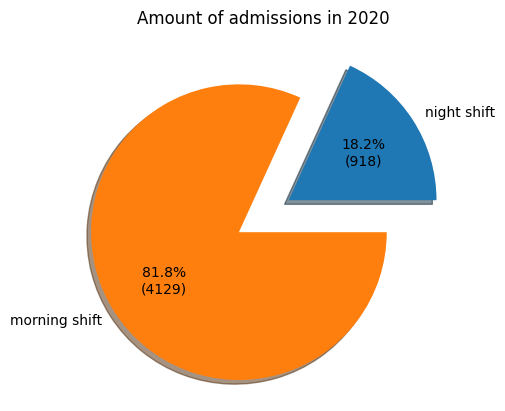

In [104]:
#print pie chart
labels=["night shift", "morning shift"]
plot_pie_chart(df_year,'Amount of admissions in 2020',labels)

In [105]:
#days
df_day = df.groupby(['day_of_week'])[['shift_night','shift_morning']].sum()
df_day

,shift_night,shift_morning
day_of_week,,
1-Mo,148.0,750.0
2-Tu,121.0,739.0
3-We,125.0,716.0
4-Th,146.0,713.0
5-Fr,128.0,645.0
6-Sa,136.0,310.0
7-Su,114.0,256.0


Text(0, 0.5, 'Number of Admissions')

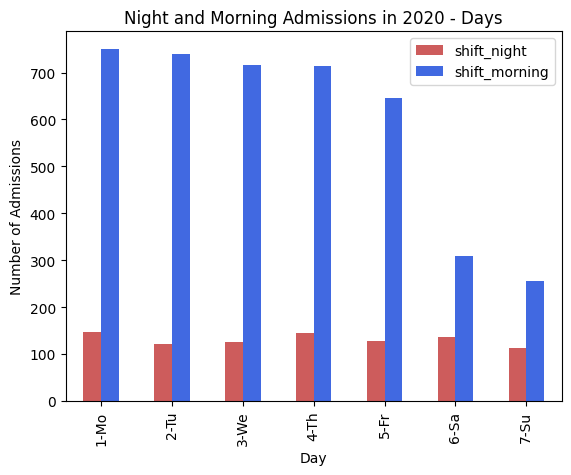

In [106]:
# Create bar chart - days
df_day.plot(kind='bar', color=['indianred', 'royalblue'], )
 
# Add Title and Labels
plt.title('Night and Morning Admissions in 2020 - Days')
plt.xlabel('Day')
plt.ylabel('Number of Admissions')

In [107]:
#month
df_month = df.groupby(['month'])[['shift_night', 'shift_morning']].sum()
df_month

,shift_night,shift_morning
month,,
1,111.0,432.0
2,95.0,418.0
3,65.0,249.0
4,68.0,284.0
5,71.0,313.0
6,72.0,375.0
7,55.0,342.0
8,90.0,326.0
9,76.0,345.0


Text(0, 0.5, 'Number of Admissions')

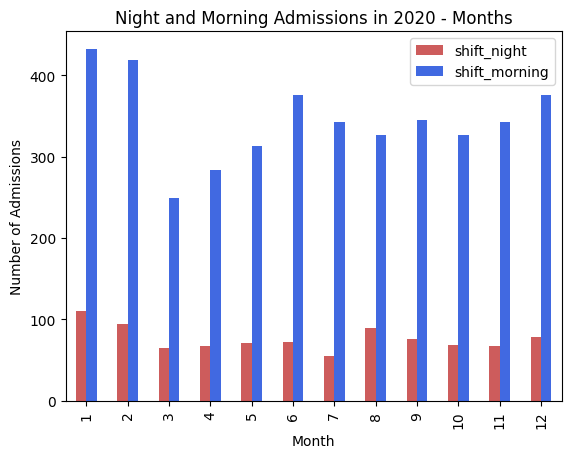

In [108]:
# create bar chart -month
df_month.plot(kind='bar', color=['indianred', 'royalblue'])
 
# Add Title and Labels
plt.title('Night and Morning Admissions in 2020 - Months')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

In [109]:
#season
df_season = df.groupby(['season'])[['shift_night','shift_morning' ]].sum()
df_season

,shift_night,shift_morning
season,,
1-winter,285.0,1226.0
2-spring,204.0,846.0
3-summer,217.0,1043.0
4-autumn,212.0,1014.0


Text(0, 0.5, 'Number of Admissions')

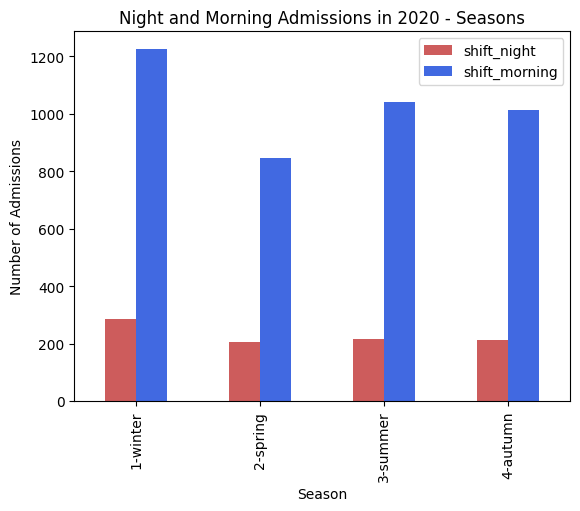

In [110]:
# create bar chart - season
df_season.plot(kind='bar', color=['indianred', 'royalblue'])
 
# Add Title and Labels
plt.title('Night and Morning Admissions in 2020 - Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Admissions')

In [111]:
#age
df_age_group = df.groupby(['age_group'])[['total_admissions']].sum()
df_age_group

,total_admissions
age_group,
11÷20,20
21÷30,74
31÷40,190
41÷50,483
51÷60,603
61÷70,1351
71÷80,1703
81÷90,574
91+,49


Text(0, 0.5, 'Number of Admissions')

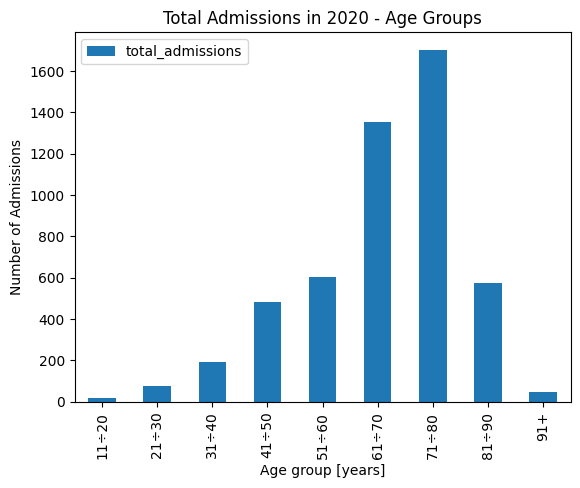

In [112]:
# create bar chart - age group
df_age_group.plot(kind='bar')
 
# Add Title and Labels
plt.title('Total Admissions in 2020 - Age Groups')
plt.xlabel('Age group [years]')
plt.ylabel('Number of Admissions')

In [113]:
#pie chart - reason
df_reason = df['reason'].value_counts()
df_reason

chestpain          1221
palpitation        1020
cardioversion      1000
other               995
breathlessness      689
unconsciousness     122
Name: reason, dtype: int64

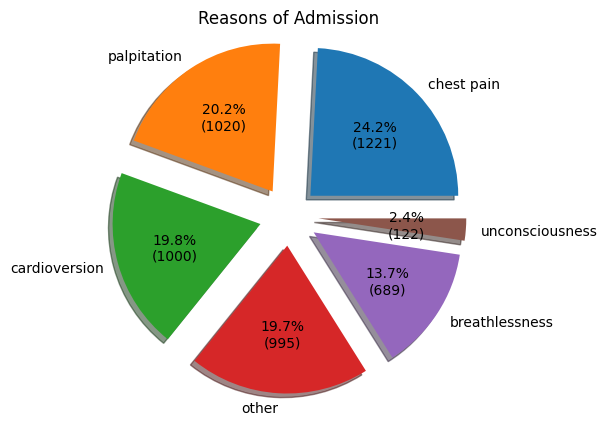

In [114]:
#print pie chart
labels=["chest pain", "palpitation", 'cardioversion', 'other','breathlessness', 'unconsciousness']
plot_pie_chart(df_reason,'Reasons of Admission',labels)

In [115]:
#pie chart - sent to
df_sent = df['sent_to'].value_counts()
df_sent


Home Treatment              3353
Cardio Clinic Department    1289
Other                        405
Name: sent_to, dtype: int64

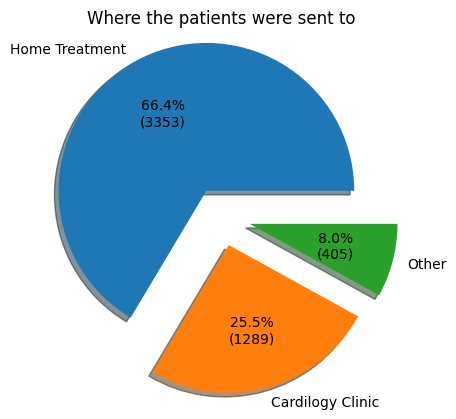

In [116]:
#print pie chart
labels=["Home Treatment", "Cardilogy Clinic", 'Other']
plot_pie_chart(df_sent,'Where the patients were sent to',labels)

In [117]:
#pie chart - admission_type
df_admission = df['admission_type'].value_counts()
df_admission

without recommendation         1780
by ambulance                   1279
from ambulant doctor           1077
from other hospital             403
from A&E Cardio Clinic IKEM     367
other                           141
Name: admission_type, dtype: int64

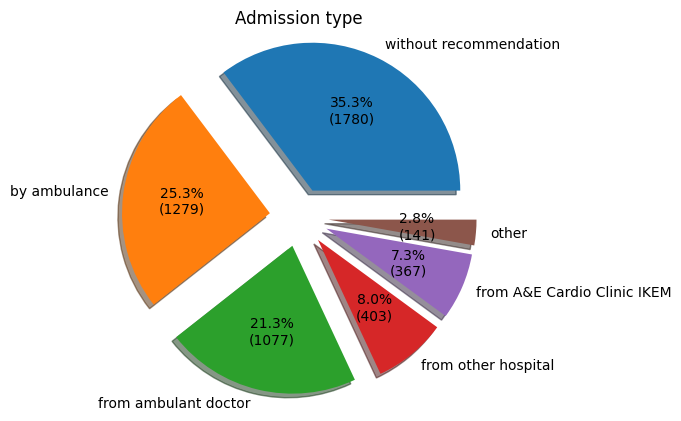

In [118]:
#print pie chart
labels=["without recommendation", "by ambulance", 'from ambulant doctor ',"from other hospital", "from A&E Cardio Clinic IKEM", 'other']
plot_pie_chart(df_admission,'Admission type',labels)

In [119]:
###########################
#PART IV - Dependencies - Heatmap
###########################

In [120]:
#dummy encoding

df_2 = pd.get_dummies(df, columns = ["reason"], prefix=["reason"])

In [121]:
#dummy encoding
list_col=["reason","age_group","sent_to","admission_type", 'season']

df_2 = pd.get_dummies(df, columns = list_col, prefix=list_col)
                            

In [122]:
#Group the data
df_2 = df_2.groupby(['week']).sum()


In [123]:
#drop useless columns
df_2=df_2.drop(['birth_year', 'age','month','year'], axis=1)

<AxesSubplot: >

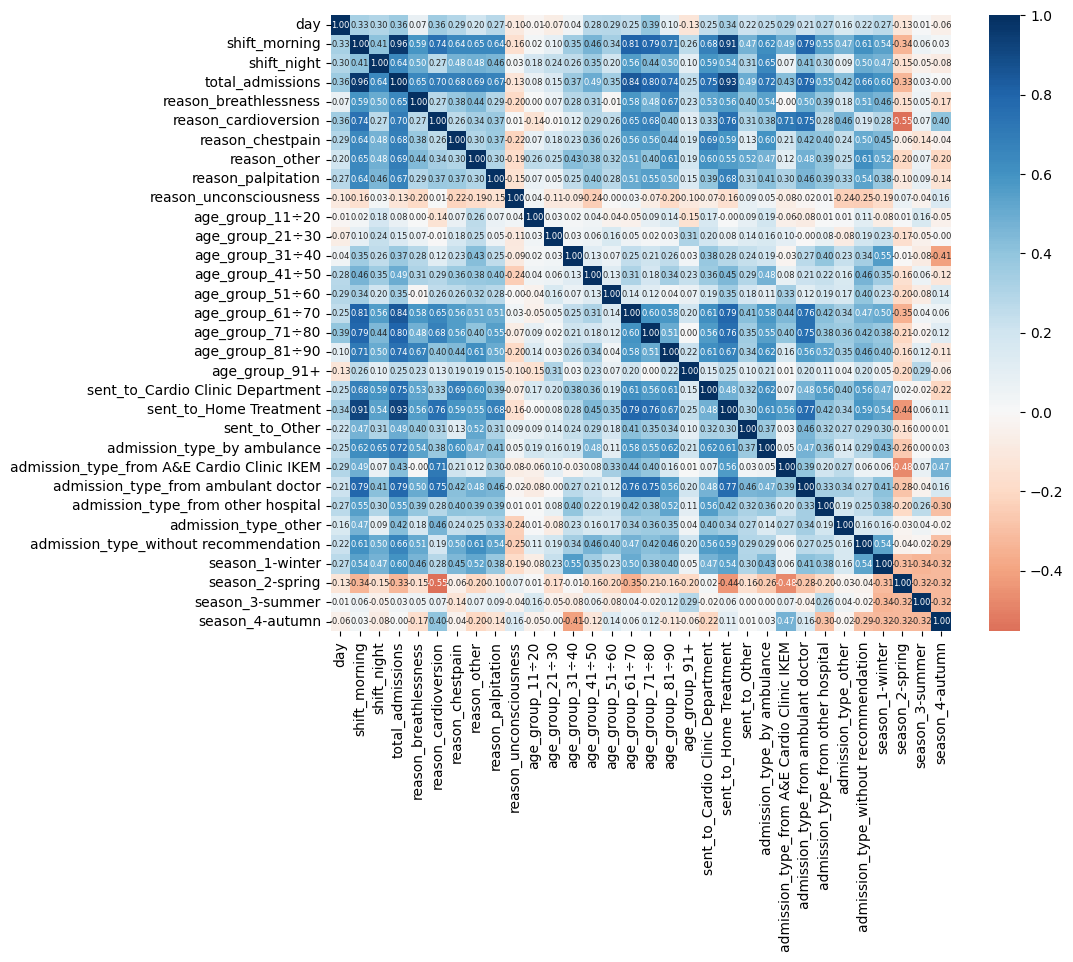

In [124]:
#Heatmap with correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_2.corr(), cmap='RdBu', center=0, annot_kws={"size":6}, annot=True, fmt=".2f")

**Preparing data for Processing**

**Group data, convert from string, plot**

In [125]:
#group same days and sum admissions for that days
df_grouped = df.groupby(['date'],as_index = False)[['total_admissions']].sum().reset_index(drop=True)
df_grouped.head(2)


,date,total_admissions
0,2020-01-01,7
1,2020-01-02,17


In [126]:
#convert data from string to INT64 and Datetime

#convert column into a datatime
df_grouped['date']=pd.to_datetime(df_grouped['date'], errors='coerce', format='%Y-%m-%d')

#convert second column into integer
df_grouped['total_admissions']=df_grouped['total_admissions'].astype('int64')

df_grouped.head(3)

,date,total_admissions
0,2020-01-01,7
1,2020-01-02,17
2,2020-01-03,17


In [127]:
#check the dtype of columns
df_grouped.dtypes

date                datetime64[ns]
total_admissions             int64
dtype: object

In [128]:
#change index of DataFrame from numbers to date, allows to print charts easily
#add missing days if there are any and  fill in a value ZERO
df_grouped = df_grouped.set_index('date').asfreq('1D', fill_value=0)

df_grouped.head(3)

,total_admissions
date,
2020-01-01,7
2020-01-02,17
2020-01-03,17


In [129]:
#check number of days which were added and had value ZERO
searched_value=0

try:
    value=df_grouped['total_admissions'].value_counts()[searched_value]
except:
    print('Nothing added!!!')   
else:
    print(f'Added:{value} values!!!')

Nothing added!!!


In [130]:
#check for NaN
df_grouped.isnull().sum()

total_admissions    0
dtype: int64

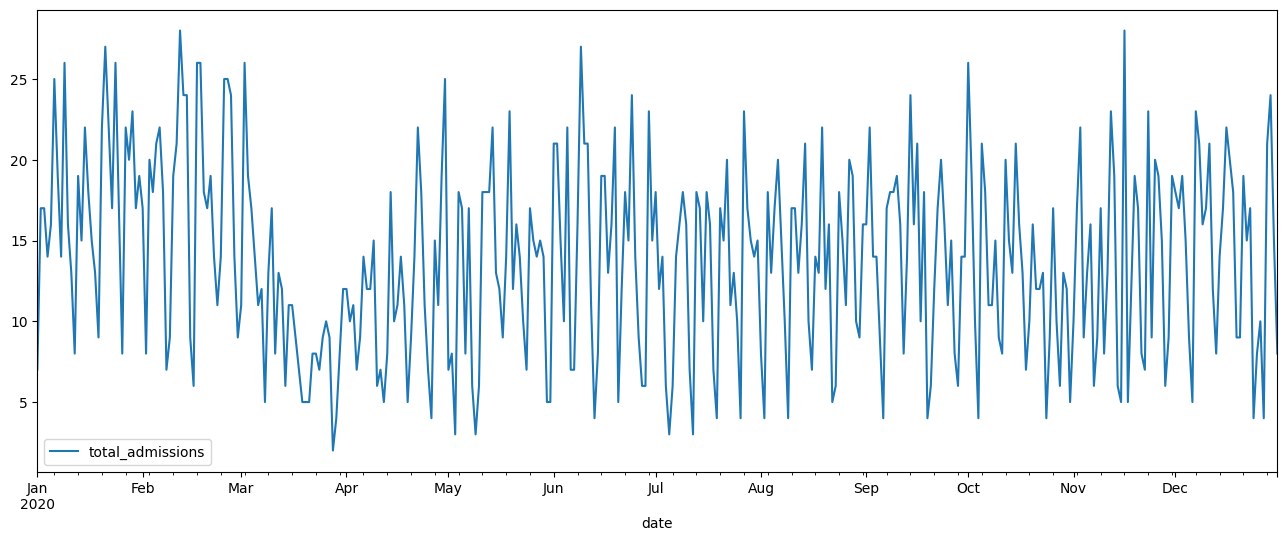

In [131]:
#plot a chart
df_grouped.plot(figsize=(16,6))
plt.show()

**Check for stationarity**

In [132]:
#define function for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def df_test(df_column):
    dftest = adfuller(df_column.dropna()) #drop if tested data contains NaNs
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    #print final statement about the test
    if dfoutput['Test Statistic']>=dfoutput['Critical Value (5%)']:
        print('Data are NON-STATIONARY!!!')
    else:
        print('Data are STATIONARY.')

In [133]:
#Perform DF test
df_test(df_grouped['total_admissions'])

Test Statistic         -2.512822
p-value                 0.112386
Critical Value (1%)    -3.449173
Critical Value (5%)    -2.869833
Critical Value (10%)   -2.571188
dtype: float64
Data are NON-STATIONARY!!!


**Make data stationary**

In [134]:
#1st order differencing 
df_grouped['total_admissions-diff-1st']=df_grouped['total_admissions']-df_grouped['total_admissions'].shift(1)
df_grouped.head(3)

,total_admissions,total_admissions-diff-1st
date,,
2020-01-01,7,NaN
2020-01-02,17,10.0
2020-01-03,17,0.0


In [135]:
#check for NaN
df_grouped.isnull().sum()

total_admissions             0
total_admissions-diff-1st    1
dtype: int64

In [136]:
#drop NaN
df_grouped.dropna(inplace=True)
df_grouped.isnull().sum()

total_admissions             0
total_admissions-diff-1st    0
dtype: int64

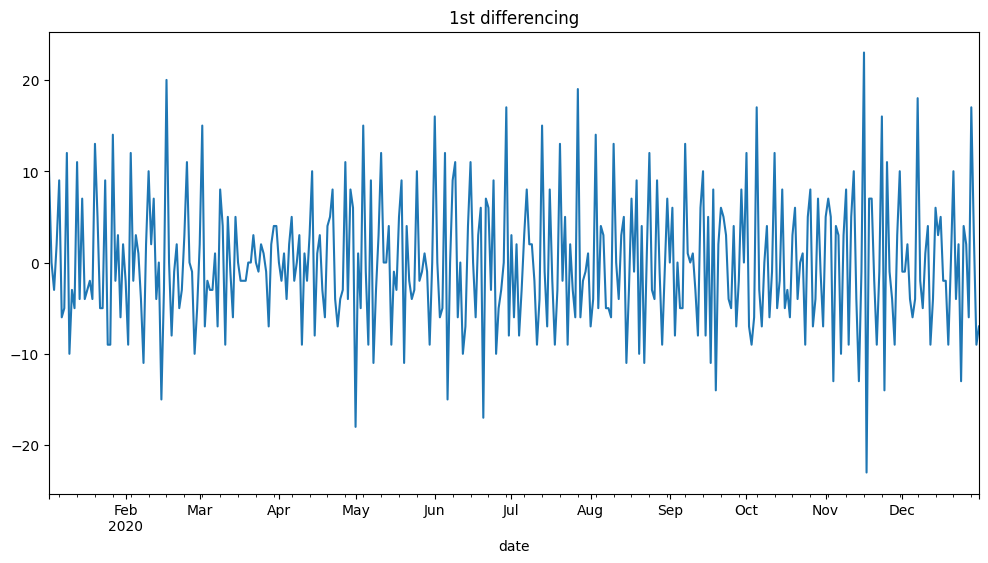

In [137]:
#plot the results
df_grouped['total_admissions-diff-1st'].plot(figsize=(12,6),title='1st differencing')

plt.show()

**Choose parameters for ARIMA/SARIMA**

c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


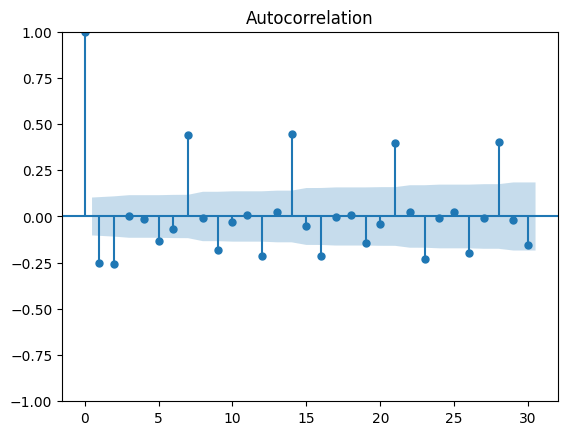

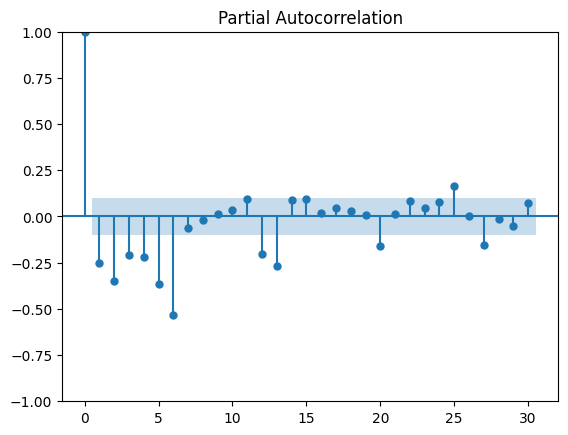

In [138]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#get q parameter from autocorelation
plot_acf(df_grouped['total_admissions-diff-1st'],lags=30)

#get p parameter from partial correlation
plot_pacf(df_grouped['total_admissions-diff-1st'],lags=30); #without semicolon it would be printed twice

**Define model and fit**

In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

#define the model
#order (p, d, q) (P, D, Q)m
#we got p and q from the autocorellation charts
#we choose d on the base how many 2 differencing we did (d=1=1st differencing, d=2=2nd differencing)
#m = periodicity,  i.e. the number of periods in season, 12 for monthly data, 7 for weekly data, etc.


model_ar=ARIMA(df_grouped['total_admissions'],order=(1,1,1))
model_sar=SARIMAX(df_grouped['total_admissions'],order=(1,1,1),seasonal_order=(1,1,1,120))

In [140]:
#fit the model
result_ar=model_ar.fit()

#because Sarima has high seasonal order we need to adjust the fit method
#https://stackoverflow.com/questions/56591185/float-object-argument-after-must-be-an-iterable-not-float-not-sure-what-im
result_sar=model_sar.fit() #low_memory=True, cov_type='none'


c:\Users\macab\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


**Compare prediction with real data**

In [141]:
df_grouped.shape

(365, 2)

In [142]:
#define the start and end
length_test_sample = 30
start=len(df_grouped)-length_test_sample-1
end=len(df_grouped)-1

print(f' start: {start} \n end: {end} \n delta: {end-start}')

 start: 334 
 end: 364 
 delta: 30


In [143]:
prediction_test=pd.DataFrame()
prediction_test['Real']=df_grouped['total_admissions'].iloc[-length_test_sample:]

prediction_test['Predicted-Arima']=result_ar.predict(start=start, end=end, dynamic=True)
prediction_test['Predicted-Sarima']=result_sar.predict(start=start, end=end, dynamic=True)

In [144]:
prediction_test.head(5)

,Real,Predicted-Arima,Predicted-Sarima
date,,,
2020-12-02,17,13.718876,15.131217
2020-12-03,19,13.534451,17.033568
2020-12-04,15,13.496616,19.028502
2020-12-05,9,13.488855,16.678671
2020-12-06,5,13.487262,10.352993


In [145]:
#check for NaN
prediction_test.isnull().sum()

Real                0
Predicted-Arima     0
Predicted-Sarima    0
dtype: int64

In [146]:
#remove NaN
prediction_test.dropna(inplace=True)
prediction_test.isnull().sum()

Real                0
Predicted-Arima     0
Predicted-Sarima    0
dtype: int64

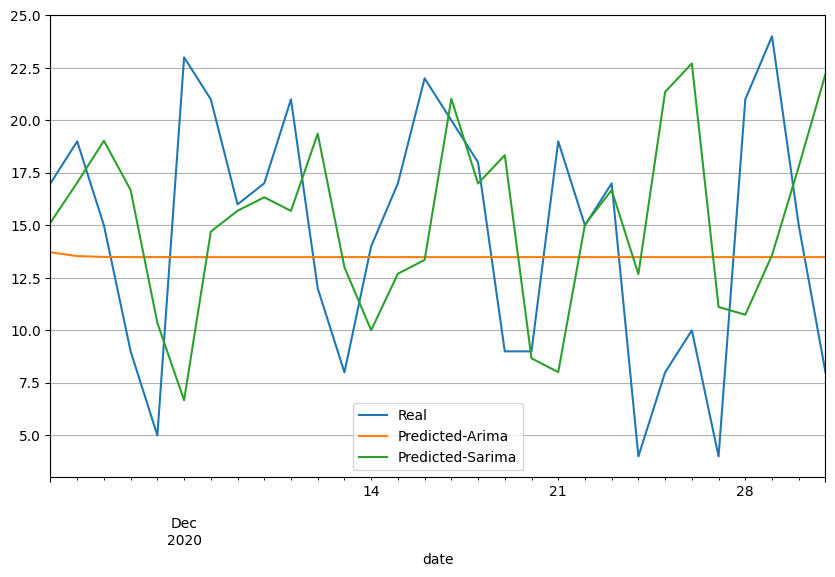

In [147]:
prediction_test[['Real', 'Predicted-Arima', 'Predicted-Sarima']].plot(figsize=(10, 6))
plt.grid(True)

**Calculate RMSE**

In [148]:
rmse_ar=np.sqrt(mean_squared_error(prediction_test['Predicted-Arima'],prediction_test['Real']))
rmse_sar=np.sqrt(mean_squared_error(prediction_test['Predicted-Sarima'],prediction_test['Real']))

print(f' RMSE-Arima {round(rmse_ar,2)} \n RMSE-Sarima {round(rmse_sar,2)}')

 RMSE-Arima 5.9 
 RMSE-Sarima 7.6


**Create new Datetime**

In [149]:
#get the last row of the dataset
df_grouped.tail(1)

,total_admissions,total_admissions-diff-1st
date,,
2020-12-31,8,-7.0


In [158]:
#get first index of the dataset
start_date=df_grouped.index[len(df_grouped)-1]
start_date

Timestamp('2020-12-31 00:00:00', freq='D')

In [159]:
import datetime
from dateutil.relativedelta import relativedelta

n_predictions=14

#first predicted month going after the last dataset month
#start_date = datetime.datetime.strptime("2021-01-01", "%Y-%m-%d") 

#create date list for next 14 days
date_list = [start_date + relativedelta(days=x) for x in range(0,n_predictions)]

#
future_prediction = pd.DataFrame(index=date_list, columns= df_grouped.columns)

#merge 2 datetimes 
data = pd.concat([df_grouped, future_prediction])

In [160]:
data.tail(15)

,total_admissions,total_admissions-diff-1st
2020-12-31,8,-7.0
2020-12-31,NaN,NaN
2021-01-01,NaN,NaN
2021-01-02,NaN,NaN
2021-01-03,NaN,NaN
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,NaN,NaN


**Predict next 14 days**

In [161]:
#define the start and end
length_test_sample = 30
start_pred=len(df_grouped)
end_pred=len(df_grouped) + n_predictions

print(f' start: {start_pred} \n end: {end_pred} \n delta: {end_pred-start_pred}')

 start: 365 
 end: 379 
 delta: 14


In [162]:
data['future_prediction-Arima']=result_ar.predict(start=start_pred, end=end_pred, dynamic=True)
data['future_prediction-Sarima']=result_sar.predict(start=start_pred, end=end_pred, dynamic=True)

In [163]:
data.tail(5)

,total_admissions,total_admissions-diff-1st,future_prediction-Arima,future_prediction-Sarima
2021-01-09,NaN,NaN,13.909951,18.210545
2021-01-10,NaN,NaN,13.909954,10.319106
2021-01-11,NaN,NaN,13.909955,13.592150
2021-01-12,NaN,NaN,13.909955,18.972068
2021-01-13,NaN,NaN,13.909955,14.838272


**Plot the results**

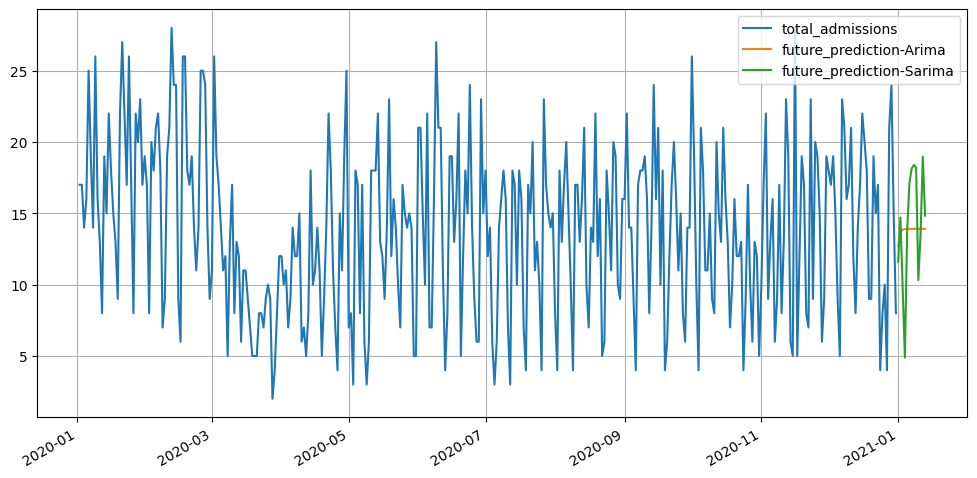

In [164]:
data[['total_admissions','future_prediction-Arima','future_prediction-Sarima']].plot(figsize=(12, 6))
plt.grid(True)

**Export model**

In [157]:
#Save model
import joblib

joblib.dump(model_sar, filename='Sarima-Admission.pkl')

['Sarima-Admission.pkl']